In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, glob
import librosa
import librosa.display
import soundfile as sf
from scipy.signal import chirp, spectrogram, stft
%matplotlib inline

In [2]:
obj_two_data = pd.read_excel('object2.xlsx', header = None)
obj_one_data = pd.read_excel('object1.xlsx', header = None)
obj_one_data.shape

(241, 16384)

In [3]:
obj_two_data.shape

(331, 16384)

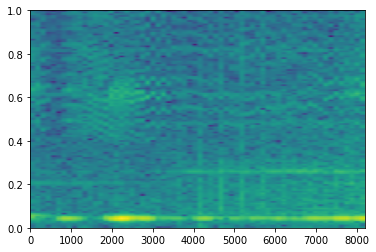

In [4]:
array_obj_two = np.array(obj_two_data)
array_obj_two = np.delete(array_obj_two, 1, 0)
array_obj_two = np.delete(array_obj_two, 1, 0)
array_obj_one = np.array(obj_one_data)
array_obj_one = np.delete(array_obj_one, 1, 0)

array_obj_one = np.delete(array_obj_one, 1, 0)

# mfccs_obj_two = array_obj_two[np.logical_not(np.isnan(array_obj_two))]
# mfccs_obj_one = array_obj_one[np.logical_not(np.isnan(array_obj_one))]
# spectral_rolloff = librosa.feature.spectral_rolloff(array_obj_two[3], sr=22050)
# spectral_rolloff[0][1]
spectrum, freqs, t, im = plt.specgram(array_obj_two[8], NFFT=256, Fs=2, noverlap=0);

In [5]:
len(spectrum)

129

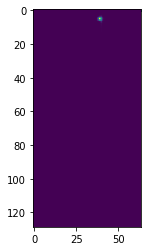

In [6]:
spectrum, freqs, t, im = plt.specgram(array_obj_one[60], NFFT=256, Fs=2, noverlap=0);
plt.imshow(spectrum)
# plt.hist(freqs)

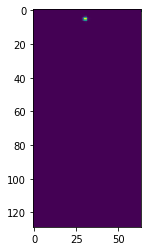

In [7]:
spectrum, freqs, t, im = plt.specgram(array_obj_two[60], NFFT=256, Fs=2, noverlap=0);
plt.imshow(spectrum)
# plt.hist(freqs)

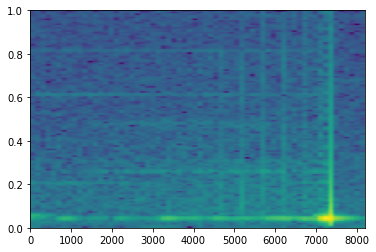

In [8]:
## Processing for object2
max_values_obj2 = []
sum_obj2 = []
max_value = 0;
mfccs_obj_two_array = []
spectral_roll_off_obj_two_array = []

for i in range(array_obj_two.shape[0]):
    spectrum, freqs, t, im = plt.specgram(array_obj_two[i], NFFT=256, Fs=2, noverlap=0);
    max_value = np.amax(abs(spectrum[0]))
    sum_obj2.append(np.sum(spectrum))
    mfccs = np.amax(librosa.feature.mfcc(np.float64(np.array(array_obj_two[i])), sr=22050))
    spectral_rolloff_obj2 = librosa.feature.spectral_rolloff(np.float64(array_obj_two[i]), sr=22050)
    for j in range(len(spectral_rolloff_obj2)):
        spectral_roll_off_obj_two_array.append(spectral_rolloff_obj2[0][j])
    max_values_obj2.append(max_value)
    mfccs_obj_two_array.append(mfccs)

array([[2.37637963e+02, 4.16376763e+02, 1.66579885e+02, ...,
        5.64478501e+01, 1.33705464e+01, 2.03654000e+01],
       [2.38430663e+02, 3.31898630e+02, 7.83348654e+01, ...,
        8.18262422e+01, 9.08035245e+00, 3.00685403e+00],
       [7.23608710e+01, 1.31867076e+02, 7.58434929e+01, ...,
        3.49694856e+00, 3.45167921e+01, 8.50616229e+01],
       ...,
       [1.02970308e+00, 3.02390964e+00, 1.32670953e+00, ...,
        8.11264524e-01, 3.11382867e-01, 3.40932293e+00],
       [8.42078651e-01, 2.42641002e+00, 4.49724898e+00, ...,
        2.71503624e+00, 5.25781090e-01, 1.22670689e+00],
       [1.00528691e+00, 9.98253626e-01, 2.51438498e+00, ...,
        3.00456755e+00, 1.82107481e-02, 4.32549951e-02]])

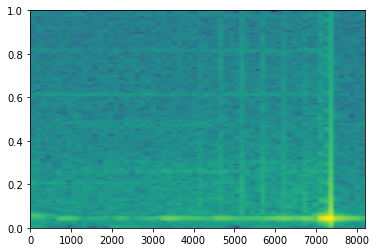

In [9]:
## Processing for object1
max_values_obj1 = []
max_value = 0;
sum_obj1 = []
mfccs_obj_one_array = []
spectral_roll_off_obj_one_array = []

for i in range(array_obj_one.shape[0]):
    spectrum, freqs, t, im = plt.specgram(array_obj_one[i], NFFT=256, Fs=2, noverlap=0)
    max_value = np.amax(abs(spectrum[0]))
    sum_obj1.append(np.sum(spectrum))
    mfccs = np.amax(librosa.feature.mfcc(np.float64(array_obj_one[i]), sr=22050))
    spectral_rolloff_obj_one = librosa.feature.spectral_rolloff(np.float64(array_obj_two[i]), sr=22050)
    for j in range(len(spectral_rolloff_obj_one)):
        spectral_roll_off_obj_one_array.append(spectral_rolloff_obj_one[0][j])
    max_values_obj1.append(max_value)
    mfccs_obj_one_array.append(mfccs)
    
spectrum

In [10]:
## Merging and creating data frame
max_freq_dataframe_obj_one = pd.DataFrame(max_values_obj1, columns=["MaxFrequency"])
max_freq_dataframe_obj_two = pd.DataFrame(max_values_obj2, columns=["MaxFrequency"])
sum_obj1 = pd.DataFrame(sum_obj1, columns=["MaxSpectrumSum"])
sum_obj2 = pd.DataFrame(sum_obj2, columns=["MaxSpectrumSum"])
mfccs_dataframe_obj_one = pd.DataFrame(mfccs_obj_one_array, columns=["MFCCS"])
mfccs_dataframe_obj_two = pd.DataFrame(mfccs_obj_two_array, columns=["MFCCS"])
spectral_roll_off_obj_one = pd.DataFrame(spectral_roll_off_obj_one_array, columns=["SpectralRollOff"])
spectral_roll_off_obj_two = pd.DataFrame(spectral_roll_off_obj_two_array, columns=["SpectralRollOff"])
print(max_freq_dataframe_obj_one.shape)
print(max_freq_dataframe_obj_two.shape)
print(mfccs_dataframe_obj_one.shape)
print(mfccs_dataframe_obj_two.shape)
print(sum_obj1.shape)

(239, 1)
(329, 1)
(239, 1)
(329, 1)
(239, 1)


In [11]:
max_freq_dataframe_obj_one

,MaxFrequency
0,2.246051e+10
1,3.842053e+03
2,7.910337e+02
3,3.805260e+03
4,1.038515e+03
...,...
234,2.575252e+04
235,2.405796e+05
236,5.979487e+04
237,6.739959e+04


In [12]:
mfccs_dataframe_obj_one["Target"] = 0
mfccs_dataframe_obj_two["Target"] = 1
#sum_obj1["Target"] = 0
# sum_obj2["Target"] = 1
max_freq_dataframe_obj_one["Target"] = 0
max_freq_dataframe_obj_two["Target"] = 1
spectral_roll_off_obj_one["Target"] = 0
spectral_roll_off_obj_two["Target"] = 1

frames = [mfccs_dataframe_obj_one, mfccs_dataframe_obj_two]
frames_freq = [max_freq_dataframe_obj_one, max_freq_dataframe_obj_two]
spectogram_rolloff = [spectral_roll_off_obj_one, spectral_roll_off_obj_two]
max_sum_frames = [sum_obj1, sum_obj2]
final_data_frame= pd.concat(frames)
final_freq_frame = pd.concat(frames_freq)
final_spe_roll = pd.concat(spectogram_rolloff)
final_max_sum = pd.concat(max_sum_frames)

# frames_final = [final_freq_frame, final_data_frame.reindex(final_freq_frame.index)]

# final_data_frame = pd.concat(frames_final, axis=1)
# frames_final[final_freq_frame]
# print(final_data_frame.shape)
# print(final_freq_frame.shape)
# frames_final = pd.merge(final_data_frame, final_spe_roll)
final_max_sum

,MaxSpectrumSum
0,7.329066e+11
1,9.404116e+07
2,9.100440e+07
3,9.440205e+07
4,8.705725e+07
...,...
324,1.737546e+09
325,1.605577e+09
326,1.803108e+09
327,1.383324e+09


In [13]:
final_data_frame = pd.concat([final_freq_frame, final_max_sum], axis =1)
final_data_frame.isnull().values.any()
final_data_frame

,MaxFrequency,Target,MaxSpectrumSum
0,2.246051e+10,0,7.329066e+11
1,3.842053e+03,0,9.404116e+07
2,7.910337e+02,0,9.100440e+07
3,3.805260e+03,0,9.440205e+07
4,1.038515e+03,0,8.705725e+07
...,...,...,...
324,3.264063e+04,1,1.737546e+09
325,1.516015e+04,1,1.605577e+09
326,2.233882e+05,1,1.803108e+09
327,8.748207e+03,1,1.383324e+09


In [14]:
from sklearn.model_selection import train_test_split, cross_val_score

# Now splitting the data to test and training sets, its important never let our model to learn from test.
X = final_data_frame.drop("Target", axis =1)
y = final_data_frame["Target"]
np.random.seed(42)

# split in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # 20 % data to be used for testing
X

,MaxFrequency,MaxSpectrumSum
0,2.246051e+10,7.329066e+11
1,3.842053e+03,9.404116e+07
2,7.910337e+02,9.100440e+07
3,3.805260e+03,9.440205e+07
4,1.038515e+03,8.705725e+07
...,...,...
324,3.264063e+04,1.737546e+09
325,1.516015e+04,1.605577e+09
326,2.233882e+05,1.803108e+09
327,8.748207e+03,1.383324e+09


In [15]:
y

0      0
1      0
2      0
3      0
4      0
      ..
324    1
325    1
326    1
327    1
328    1
Name: Target, Length: 568, dtype: int64

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# put models in the dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "Decission Tree": tree.DecisionTreeClassifier()}

# Create a function to fit and score models
# fits and evaluates the machine learning models
# X_train: training data(no labels)
# X_test: testing data(no labels)
# y_train: training labels
# y_test: testing labels
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    # set a random seed
    np.random.seed(42)
    #Male a dictionary to keep model scores
    model_scores = {}
    #loop through models
    for name, model in models.items():
        # fit the mdoel to the data
        model.fit(X_train, y_train)
        # evaluate the mdoel and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [17]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

{'Logistic Regression': 0.5350877192982456,
 'KNN': 0.8508771929824561,
 'Random Forest': 0.8859649122807017,
 'Decission Tree': 0.868421052631579}

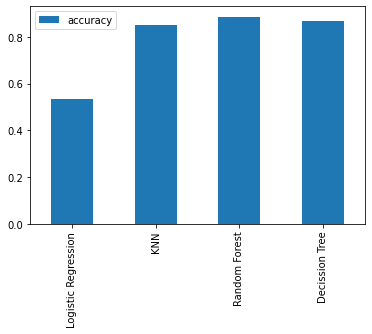

In [18]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [19]:
import pickle

# save the model to disk
filename = 'randomforest_model.sav'
pickle.dump(models["Random Forest"], open(filename, 'wb'))
 

In [36]:
read_file = pd.read_csv('/Users/brian/Desktop/Discrimination-of-reflected-sound-signals/Files_for_task_2_and_4/Object_2/frontyellow-0.8/data/002.csv', header = None, usecols=list(range(16384)))
read_file.to_excel(r'/Users/brian/Desktop/Discrimination-of-reflected-sound-signals/test_obj1.xlsx', index=None)
test_data = pd.read_excel('test_obj1.xlsx')
test_data.shape

(1, 16384)

In [37]:
read_file.shape

(1, 16384)

In [38]:
array_test = np.array(read_file)
array_test[0]

array([-12, -11,  -5, ...,  -7,  -7, -10])

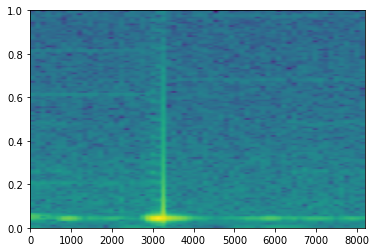

In [39]:
spectrum, freqs, t, im = plt.specgram(array_test[0], NFFT=256, Fs=2, noverlap=0)
test_max_freq = np.amax(abs(spectrum[0]))
test_max_sum = np.sum(spectrum)
# test_max_freq = np.array(test_max_freq)
# test_max_sum = np.array(test_max_sum)
# test_max_freq

In [33]:
max_freq = pd.DataFrame([test_max_freq], columns=["MaxFrequency"])
sum_obj = pd.DataFrame([test_max_sum], columns=["MaxSpectrumSum"])
frames = [max_freq, sum_obj]
final_data_frame = pd.concat(frames, axis =1)
final_data_frame

,MaxFrequency,MaxSpectrumSum
0,1075.885886,5.163424e+08


In [40]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(final_data_frame)
print(result[0])

1


## Extracting features TP, TN, FP, FN, FDR, NPV, TPR, TNR, F1, ROC

1. TP, TN, FP, FN - Confusion matrix
2. F1, ROC - Done
3. FDR, NPV, TPR, TNR

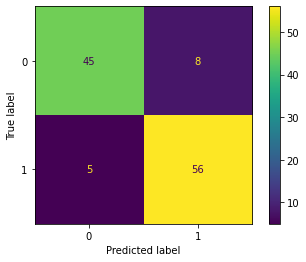

In [49]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_actual = y_test
y_est = models["Random Forest"].predict(X_test)
cm = confusion_matrix(y_actual, y_est).ravel()
tn, fp, fn, tp  = cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm.reshape(2,2))
disp.plot()

In [50]:
tpr = tp/(tp + fn)
tnr = tn/(tn + fp)
fdr = fp/(fp + tp)
npv = tn/(tn + fn)
print(tpr)
print(tnr)
print(fdr)
print(npv)

0.9180327868852459
0.8490566037735849
0.125
0.9


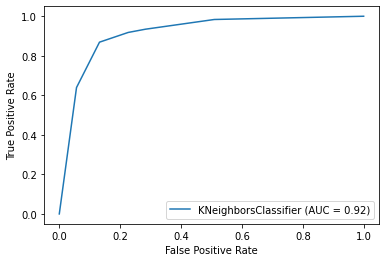

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

plot_roc_curve(models["KNN"], X_test, y_test);

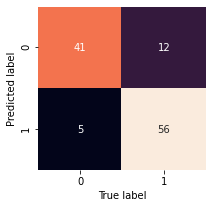

In [27]:
# Confusion matrix
import seaborn as sns # build on top pf matplotlib

y_preds = models["KNN"].predict(X_test)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

In [28]:
# Check best hyperparameters
knn_model = models["KNN"]

In [29]:
# Cross validated recall
cv_recall = cross_val_score(knn_model, X, y, cv=5, scoring="recall")

cv_recall_mean = np.mean(cv_recall)
cv_recall_mean

0.5662470862470863

In [30]:

# corss validated f1-score
cv_f1_score = cross_val_score(knn_model, X, y, cv=5, scoring="f1")

cv_rf_mean = np.mean(cv_f1_score)
cv_rf_mean

0.6260932226446172